<a href="https://colab.research.google.com/github/kaiserlp/ATOC4500_Kaiser-Borchlewicz_FinalProject/blob/main/Dataset_Tomfoolery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
#from scipy.stats import norm
import scipy.stats as stats
from scipy import integrate

from google.colab import files

import re

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 72565003017_DEN_2002-2021_hourlydata_munged.csv to 72565003017_DEN_2002-2021_hourlydata_munged.csv
User uploaded file "72565003017_DEN_2002-2021_hourlydata_munged.csv" with length 33031172 bytes


In [ ]:
uploaded2 = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 72476023066_GrandJunction_2002-2021_hourlydata_munged.csv to 72476023066_GrandJunction_2002-2021_hourlydata_munged.csv
User uploaded file "72565003017_DEN_2002-2021_hourlydata_munged.csv" with length 33031172 bytes


In [ ]:
den_data = pd.read_csv("72565003017_DEN_2002-2021_hourlydata_munged.csv")
jun_data = pd.read_csv("72476023066_GrandJunction_2002-2021_hourlydata_munged.csv")

In [ ]:
den_data

,DATE,datetime,drytemp_F,dewtemp_F,prec_inch,RH,pres_mbar,wdir,wspd_mph,wgust_mph
0,2002-01-01T00:36:00,2002-01-01 00:36:00,19.0,18.0,0.00,93.0,839.14716,60.0,9.0,26.0
1,2002-01-01T00:45:00,2002-01-01 00:45:00,19.0,19.0,0.00,100.0,839.14716,60.0,10.0,26.0
2,2002-01-01T00:53:00,2002-01-01 00:53:00,19.0,17.0,0.00,92.0,839.14716,70.0,9.0,26.0
3,2002-01-01T01:20:00,2002-01-01 01:20:00,18.0,18.0,0.00,100.0,839.14716,60.0,8.0,26.0
4,2002-01-01T01:44:00,2002-01-01 01:44:00,18.0,18.0,0.00,100.0,839.14716,60.0,6.0,26.0
...,...,...,...,...,...,...,...,...,...,...
394739,2021-12-31T22:55:00,2021-12-31 22:55:00,16.0,14.0,0.02,93.0,827.29480,40.0,3.0,18.0
394740,2021-12-31T23:15:00,2021-12-31 23:15:00,16.0,14.0,0.02,93.0,827.29480,30.0,5.0,18.0
394741,2021-12-31T23:35:00,2021-12-31 23:35:00,16.0,14.0,0.02,93.0,827.29480,30.0,6.0,18.0
394742,2021-12-31T23:55:00,2021-12-31 23:55:00,14.0,12.0,0.02,92.0,827.29480,20.0,6.0,18.0


In [ ]:
jun_data

,DATE,datetime,drytemp_F,dewtemp_F,prec_inch,RH,pres_mbar,wdir,wspd_mph,wgust_mph
0,2002-01-01T00:00:00,2002-01-01 00:00:00,31.0,29.0,0.00,92.0,859.1269,70.0,5.0,21.0
1,2002-01-01T00:09:00,2002-01-01 00:09:00,32.0,28.0,0.00,87.0,859.1269,70.0,5.0,21.0
2,2002-01-01T01:00:00,2002-01-01 01:00:00,31.0,29.0,0.00,92.0,859.1269,0.0,0.0,21.0
3,2002-01-01T01:04:00,2002-01-01 01:04:00,30.0,28.0,0.01,93.0,859.1269,230.0,3.0,21.0
4,2002-01-01T01:35:00,2002-01-01 01:35:00,30.0,28.0,0.01,93.0,859.1269,0.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
243490,2021-12-31T22:53:00,2021-12-31 22:53:00,26.0,23.0,0.00,88.0,838.1312,320.0,3.0,18.0
243491,2021-12-31T23:00:00,2021-12-31 23:00:00,26.0,23.0,0.00,88.0,840.5017,320.0,3.0,18.0
243492,2021-12-31T23:53:00,2021-12-31 23:53:00,24.0,22.0,0.00,91.0,838.1312,320.0,6.0,18.0
243493,2021-12-31T23:59:00,2021-12-31 23:59:00,24.0,22.0,0.00,91.0,838.1312,320.0,6.0,18.0


<function matplotlib.pyplot.show>

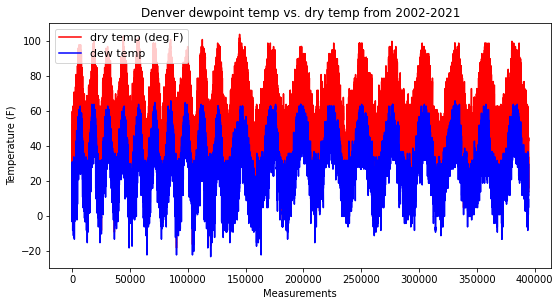

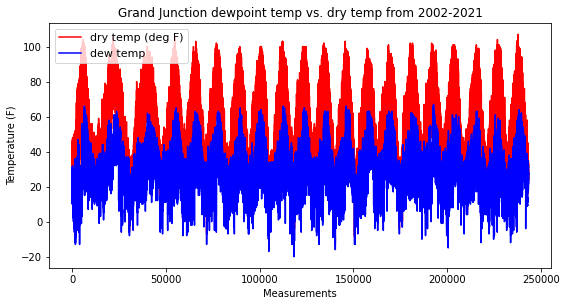

In [ ]:
den_dates = []
den_dates.extend(range(0, 394744))
jun_dates = []
jun_dates.extend(range(0, 243495))

fig1 = plt.figure(figsize=(9,4.5))
plt.plot(den_dates, den_data.drytemp_F, color = 'r', label = 'dry temp (deg F)')
plt.plot(den_dates, den_data.dewtemp_F, color = 'b', label = 'dew temp')
plt.title("Denver dewpoint temp vs. dry temp from 2002-2021")
plt.xlabel("Measurements") 
plt.ylabel("Temperature (F)")
plt.legend(loc='upper left', fontsize=11)
plt.show

fig2 = plt.figure(figsize=(9,4.5))
plt.plot(jun_dates, jun_data.drytemp_F, color = 'r', label = 'dry temp (deg F)')
plt.plot(jun_dates, jun_data.dewtemp_F, color = 'b', label = 'dew temp')
plt.title("Grand Junction dewpoint temp vs. dry temp from 2002-2021")
plt.xlabel("Measurements") 
plt.ylabel("Temperature (F)")
plt.legend(loc='upper left', fontsize=11)
plt.show

Spacing got a little funky since I was having difficulty converting the date fields to floats. I had to instead use a running count for each entry in the table, which was inconsistent across days (i.e. some days had more entries than others).

In [ ]:
type(den_data.DATE[0])

str

In [ ]:
jan1_count = 0
jan2_count = 0
count = 0

for i in den_data.DATE:
  if(re.search("^2002-01-01", i)):
    jan1_count += 1
  elif(re.search("^2002-01-02", i)):
    jan2_count += 1
  elif(re.search("2012-07-09", i)):
    count += 1
  else:
    break

print(jan1_count)
print(jan2_count)
print(count)

47
29
0


In [ ]:
test = den_data.DATE[0]

print(type(test), test)
print(test[0:10])

dehyphened = den_data.DATE[0][0:10].replace("-", "")
print(dehyphened)

<class 'str'> 2002-01-01T00:36:00
2002-01-01
20020101


In [ ]:
den_data.head(n=1)

,DATE,datetime,drytemp_F,dewtemp_F,prec_inch,RH,pres_mbar,wdir,wspd_mph,wgust_mph
0,2002-01-01T00:36:00,2002-01-01 00:36:00,19.0,18.0,0.0,93.0,839.14716,60.0,9.0,26.0


In [ ]:
type(den_data.datetime[0])
type(den_data.drytemp_F[0])

print(type(jun_data.DATE[0]))
print(type(den_data.DATE[0]))

<class 'str'>
<class 'str'>


In [ ]:
count = 0
for i, row in den_data.iterrows():
  if(count == 1):
    break
  print(type(row['DATE']))
  print(type(row["DATE"][0:10]))
  count += 1

<class 'str'>
<class 'str'>


In [ ]:
# NOTE: this cell should take at least 35 seconds to run

# variables to store daily values, initialized to the values of the first row of our current dataset
day = den_data.DATE[0][0:10]
dateTime = den_data.DATE[0]
min_dry = den_data.drytemp_F[0]
max_dry = den_data.drytemp_F[0]
min_dew = den_data.dewtemp_F[0]
max_dew = den_data.dewtemp_F[0]
#Flag for if there was precipitation, defaulted to 0 (false)
precip_flag = 0
# arrays to store values that we want an average of. Average will be calculated once the day is "completed"
  # We won't be including wind direction due to its circular nature, so it would be difficult to encapsulate that in an average value
temp_rh = [den_data.RH[0]]
temp_pres = [den_data.pres_mbar[0]]
temp_wind_spd = [den_data.wspd_mph[0]]
temp_wind_gust = [den_data.wgust_mph[0]]
count = 1

# arrays to store calculated daily values, out of which we'll create a new dataset broken up by day
date = []
num_entries = []
daily_min_dry = []
daily_max_dry = []
daily_min_dew = []
daily_max_dew = []
precip = [] #binary yes/no
rh = []
pres = []
wind_spd = []
wind_gust = []

for i, row in den_data.iterrows():
  # ----------------------------------------- Skip duplicate values ------------------------------------------- 
  # Want to make sure we don't include these, as they may skew our averages
  if(dateTime == row['DATE']):
    pass

  # ------------------------------------------- Day has updated -----------------------------------------------
  # Perform all necessary calculations, store all relevant values, then reset all the temp variables
  elif(day != row['DATE'][0:10]):
    #------------------Calculate & store----------------------
    # Calculate averages
    avg_rh = sum(temp_rh)/count
    avg_pres = sum(temp_pres)/count
    avg_wind_spd = sum(temp_wind_spd)/count
    avg_wind_gust = sum(temp_wind_gust)/count

    #Store values in appropriate lists
    date.append(day.replace("-", ""))
    num_entries.append(count)

    daily_min_dry.append(min_dry)
    daily_max_dry.append(max_dry)
    daily_min_dew.append(min_dew)
    daily_max_dew.append(max_dew)

    precip.append(precip_flag)

    rh.append(avg_rh)
    pres.append(avg_pres)
    wind_spd.append(avg_wind_spd)
    wind_gust.append(avg_wind_gust)
    #------------------------Update---------------------------
    # Update timekeeping comparison variables, removing hyphens for ease of conversion
    day = row['DATE'][0:10]
    dateTime = row['DATE']

    # Reset temp mins/maxes to respective values associated w/ new 1st day
    min_dry = row['drytemp_F']
    max_dry = row['drytemp_F']
    min_dew = row['dewtemp_F']
    max_dew = row['dewtemp_F']

    # Reset precipitation flag
    precip_flag = 0
    
    # Reset temp arrays to respective values associated w/ new 1st day
    temp_rh = [row['RH']]
    temp_pres = [row['pres_mbar']]
    temp_wind_spd = [row['wspd_mph']]
    temp_wind_gust = [row['wgust_mph']]

    # Reset count (our counter for calculating the average) to 1
    count = 1

  #  ------------------------------------------- Same day -----------------------------------------------
  # continue accumulating and checking data
  else:
    # Update dateTime
    dateTime = row['DATE']

    # Check temperature mins/maxes and update as necessary
    if(row['drytemp_F'] < min_dry):
      min_dry = row['drytemp_F']

    if(row['drytemp_F'] > max_dry):
      max_dry = row['drytemp_F']

    if(row['dewtemp_F'] < min_dew):
      min_dew = row['dewtemp_F']

    if(row['dewtemp_F'] > max_dew):
      max_dew = row['dewtemp_F']

    # Check if there was precipitation. If there was, flip the flag
    if(row['prec_inch'] > 0.0):
      precip_flag = 1
    
    # Append all other values to respective lists
    temp_rh.append(row['RH'])
    temp_pres.append(row['pres_mbar'])
    temp_wind_spd.append(row['wspd_mph'])
    temp_wind_gust.append(row['wgust_mph'])

    # Increment count
    count += 1

#--------------------------------- Don't forget the last day --------------------------------
# Because of how the loop works, calculations aren't performed on the final day
# The easiest fix is to just include it all here at the end
avg_rh = sum(temp_rh)/count
avg_pres = sum(temp_pres)/count
avg_wind_spd = sum(temp_wind_spd)/count
avg_wind_gust = sum(temp_wind_gust)/count

#Store values in appropriate lists
date.append(day.replace("-", ""))
num_entries.append(count)

daily_min_dry.append(min_dry)
daily_max_dry.append(max_dry)
daily_min_dew.append(min_dew)
daily_max_dew.append(max_dew)

precip.append(precip_flag)

rh.append(avg_rh)
pres.append(avg_pres)
wind_spd.append(avg_wind_spd)
wind_gust.append(avg_wind_gust)

#print(type(date[0]))

#---------------------------------------- Create new dataframe ------------------------------------------
den_dict = {'date': date, 'points': num_entries, 'min_dry': daily_min_dry, 'max_dry': daily_max_dry, 'min_dew': daily_min_dew, 'max_dew': daily_max_dew, 'precip': precip, 'avg_rh': rh, 'avg_pres': pres, 'avg_wind_spd': wind_spd, 'avg_wind_gust': wind_gust}
den_df = pd.DataFrame(den_dict)

den_df

#------------------------------------- Export dataframe to a csv ----------------------------------------
#den_df.to_csv('LCD_Denver_2002-2021_daily.csv', index=False)
#files.download('LCD_Denver_2002-2021_daily.csv')

#print("-------------------date--------------------\n", date, "\n", len(date))
#print("\n-------------------count-------------------\n", num_entries, "\n", len(num_entries))
#print("\n---------------daily_min_dry---------------\n", daily_min_dry, "\n", len(daily_min_dry))
#print("\n---------------daily_max_dry---------------\n", daily_max_dry, "\n", len(daily_max_dry))
#print("\n---------------daily_min_dew---------------\n", daily_min_dew, "\n", len(daily_min_dew))
#print("\n---------------daily_max_dew---------------\n", daily_max_dew, "\n", len(daily_max_dew))
#print("\n---------------Precipitation---------------\n", precip, "\n", len(precip))
#print("\n--------------------RH---------------------\n", rh, "\n", len(rh))
#print("\n-----------------Pressure------------------\n", pres, "\n", len(pres))
#print("\n----------------Wind Speed-----------------\n", wind_spd, "\n", len(wind_spd))
#print("\n----------------Wind Gust------------------\n", wind_gust, "\n", len(wind_gust))

,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,47,8.0,23.0,-3.0,19.0,0,85.872340,839.320080,6.553191,26.000000
1,20020102,29,1.0,35.0,-2.0,12.0,0,56.517241,834.779846,8.517241,26.000000
2,20020103,28,27.0,52.0,-1.0,21.0,0,36.535714,830.402961,12.714286,26.000000
3,20020104,37,22.0,36.0,14.0,31.0,0,73.648649,833.875341,11.621622,24.702703
4,20020105,30,20.0,40.0,8.0,17.0,0,50.433333,836.291272,8.666667,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
7296,20211227,73,23.0,43.0,12.0,18.0,1,45.410959,823.588303,4.136986,16.109589
7297,20211228,73,21.0,37.0,1.0,18.0,1,38.383562,820.809620,6.534247,17.657534
7298,20211229,73,14.0,34.0,1.0,9.0,1,44.712329,825.142338,2.780822,18.000000
7299,20211230,70,16.0,45.0,5.0,16.0,1,32.842857,820.754218,19.014286,37.600000


In [ ]:
# NOTE: this cell should take at least 20 seconds to run

# variables to store daily values, initialized to the values of the first row of our current dataset
day = jun_data.DATE[0][0:10]
dateTime = jun_data.DATE[0]
min_dry = jun_data.drytemp_F[0]
max_dry = jun_data.drytemp_F[0]
min_dew = jun_data.dewtemp_F[0]
max_dew = jun_data.dewtemp_F[0]
#Flag for if there was precipitation, defaulted to 0 (false)
precip_flag = 0
# arrays to store values that we want an average of. Average will be calculated once the day is "completed"
  # We won't be including wind direction due to its circular nature, so it would be difficult to encapsulate that in an average value
temp_rh = [jun_data.RH[0]]
temp_pres = [jun_data.pres_mbar[0]]
temp_wind_spd = [jun_data.wspd_mph[0]]
temp_wind_gust = [jun_data.wgust_mph[0]]
count = 1

# arrays to store calculated daily values, out of which we'll create a new dataset broken up by day
date = []
num_entries = []
daily_min_dry = []
daily_max_dry = []
daily_min_dew = []
daily_max_dew = []
precip = [] #binary yes/no
rh = []
pres = []
wind_spd = []
wind_gust = []

for i, row in jun_data.iterrows():
  # ----------------------------------------- Skip duplicate values ------------------------------------------- 
  # Want to make sure we don't include these, as they may skew our averages
  if(dateTime == row['DATE']):
    pass

  # ------------------------------------------- Day has updated -----------------------------------------------
  # Perform all necessary calculations, store all relevant values, then reset all the temp variables
  elif(day != row['DATE'][0:10]):
    #------------------Calculate & store----------------------
    # Calculate averages
    avg_rh = sum(temp_rh)/count
    avg_pres = sum(temp_pres)/count
    avg_wind_spd = sum(temp_wind_spd)/count
    avg_wind_gust = sum(temp_wind_gust)/count

    #Store values in appropriate lists
    date.append(day.replace("-", ""))
    num_entries.append(count)

    daily_min_dry.append(min_dry)
    daily_max_dry.append(max_dry)
    daily_min_dew.append(min_dew)
    daily_max_dew.append(max_dew)

    precip.append(precip_flag)

    rh.append(avg_rh)
    pres.append(avg_pres)
    wind_spd.append(avg_wind_spd)
    wind_gust.append(avg_wind_gust)
    #------------------------Update---------------------------
    # Update timekeeping comparison variables
    day = row['DATE'][0:10]
    dateTime = row['DATE']

    # Reset temp mins/maxes to respective values associated w/ new 1st day
    min_dry = row['drytemp_F']
    max_dry = row['drytemp_F']
    min_dew = row['dewtemp_F']
    max_dew = row['dewtemp_F']

    # Reset precipitation flag
    precip_flag = 0
    
    # Reset temp arrays to respective values associated w/ new 1st day
    temp_rh = [row['RH']]
    temp_pres = [row['pres_mbar']]
    temp_wind_spd = [row['wspd_mph']]
    temp_wind_gust = [row['wgust_mph']]

    # Reset count (our counter for calculating the average) to 1
    count = 1

  #  ------------------------------------------- Same day -----------------------------------------------
  # continue accumulating and checking data
  else:
    # Update dateTime
    dateTime = row['DATE']

    # Check temperature mins/maxes and update as necessary
    if(row['drytemp_F'] < min_dry):
      min_dry = row['drytemp_F']

    if(row['drytemp_F'] > max_dry):
      max_dry = row['drytemp_F']

    if(row['dewtemp_F'] < min_dew):
      min_dew = row['dewtemp_F']

    if(row['dewtemp_F'] > max_dew):
      max_dew = row['dewtemp_F']

    # Check if there was precipitation. If there was, flip the flag
    if(row['prec_inch'] > 0.0):
      precip_flag = 1
    
    # Append all other values to respective lists
    temp_rh.append(row['RH'])
    temp_pres.append(row['pres_mbar'])
    temp_wind_spd.append(row['wspd_mph'])
    temp_wind_gust.append(row['wgust_mph'])

    # Increment count
    count += 1

#--------------------------------- Don't forget the last day --------------------------------
# Because of how the loop works, calculations aren't performed on the final day
# The easiest fix is to just include it all here at the end
avg_rh = sum(temp_rh)/count
avg_pres = sum(temp_pres)/count
avg_wind_spd = sum(temp_wind_spd)/count
avg_wind_gust = sum(temp_wind_gust)/count

#Store values in appropriate lists
date.append(day.replace("-", ""))
num_entries.append(count)

daily_min_dry.append(min_dry)
daily_max_dry.append(max_dry)
daily_min_dew.append(min_dew)
daily_max_dew.append(max_dew)

precip.append(precip_flag)

rh.append(avg_rh)
pres.append(avg_pres)
wind_spd.append(avg_wind_spd)
wind_gust.append(avg_wind_gust)

#---------------------------------------- Create new dataframe ------------------------------------------
jun_dict = {'date': date, 'points': num_entries, 'min_dry': daily_min_dry, 'max_dry': daily_max_dry, 'min_dew': daily_min_dew, 'max_dew': daily_max_dew, 'precip': precip, 'avg_rh': rh, 'avg_pres': pres, 'avg_wind_spd': wind_spd, 'avg_wind_gust': wind_gust}
jun_df = pd.DataFrame(jun_dict)

jun_df

#------------------------------------- Export dataframe to a csv ----------------------------------------
#jun_df.to_csv('LCD_GrandJunction_2002-2021_daily.csv', index=False)
#files.download('LCD_GrandJunction_2002-2021_daily.csv')


,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,52,23.0,39.0,16.0,31.0,1,88.653846,859.380862,3.442308,21.000000
1,20020102,29,17.0,35.0,12.0,21.0,0,72.241379,861.800917,5.137931,21.000000
2,20020103,29,19.0,33.0,10.0,22.0,0,66.275862,859.231926,4.620690,21.000000
3,20020104,44,21.0,33.0,20.0,28.0,1,93.022727,859.927274,4.909091,21.000000
4,20020105,38,17.0,31.0,15.0,25.0,0,89.184211,865.427268,3.052632,21.000000
...,...,...,...,...,...,...,...,...,...,...,...
7300,20211227,29,30.0,41.0,20.0,28.0,0,66.275862,840.314857,9.517241,23.586207
7301,20211228,76,24.0,33.0,23.0,29.0,1,91.631579,838.777308,4.934211,18.000000
7302,20211229,52,19.0,30.0,17.0,27.0,1,91.826923,842.370714,2.576923,18.000000
7303,20211230,32,21.0,35.0,19.0,29.0,0,85.031250,843.030906,2.562500,18.000000


In [ ]:
print(type(jun_df.date[0]))
print(type(den_df.date[0]))

<class 'str'>
<class 'str'>


In [ ]:
jun_df

,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,52,23.0,39.0,16.0,31.0,1,88.653846,859.380862,3.442308,21.000000
1,20020102,29,17.0,35.0,12.0,21.0,0,72.241379,861.800917,5.137931,21.000000
2,20020103,29,19.0,33.0,10.0,22.0,0,66.275862,859.231926,4.620690,21.000000
3,20020104,44,21.0,33.0,20.0,28.0,1,93.022727,859.927274,4.909091,21.000000
4,20020105,38,17.0,31.0,15.0,25.0,0,89.184211,865.427268,3.052632,21.000000
...,...,...,...,...,...,...,...,...,...,...,...
7300,20211227,29,30.0,41.0,20.0,28.0,0,66.275862,840.314857,9.517241,23.586207
7301,20211228,76,24.0,33.0,23.0,29.0,1,91.631579,838.777308,4.934211,18.000000
7302,20211229,52,19.0,30.0,17.0,27.0,1,91.826923,842.370714,2.576923,18.000000
7303,20211230,32,21.0,35.0,19.0,29.0,0,85.031250,843.030906,2.562500,18.000000


In [ ]:
den_df

,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,47,8.0,23.0,-3.0,19.0,0,85.872340,839.320080,6.553191,26.000000
1,20020102,29,1.0,35.0,-2.0,12.0,0,56.517241,834.779846,8.517241,26.000000
2,20020103,28,27.0,52.0,-1.0,21.0,0,36.535714,830.402961,12.714286,26.000000
3,20020104,37,22.0,36.0,14.0,31.0,0,73.648649,833.875341,11.621622,24.702703
4,20020105,30,20.0,40.0,8.0,17.0,0,50.433333,836.291272,8.666667,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
7296,20211227,73,23.0,43.0,12.0,18.0,1,45.410959,823.588303,4.136986,16.109589
7297,20211228,73,21.0,37.0,1.0,18.0,1,38.383562,820.809620,6.534247,17.657534
7298,20211229,73,14.0,34.0,1.0,9.0,1,44.712329,825.142338,2.780822,18.000000
7299,20211230,70,16.0,45.0,5.0,16.0,1,32.842857,820.754218,19.014286,37.600000


Denver is missing 4 days. We'll have to find them and remove them from Grand Junction to make our dataframes the same size.

In [ ]:
for i in range(7305):
  jun_date = int(jun_df.date[i])
  den_date = int(den_df.date[i])
  if(jun_date != (den_date)):
    print(i, "\nJun date:", jun_df.date[i-1], jun_df.date[i], jun_df.date[i+1], "\nDen date:", den_df.date[i-1], den_df.date[i], den_df.date[i+1])
    break

3842 
Jun date: 20120708 20120709 20120710 
Den date: 20120708 20120710 20120711


In [ ]:
for i in range(3843, 7304):
  if(jun_df.date[i+1] != den_df.date[i]):
    print(i, "\nJun date:", jun_df.date[i], jun_df.date[i+1], jun_df.date[i+2], "\nDen date:", den_df.date[i-1], den_df.date[i], den_df.date[i+1])
    break

3938 
Jun date: 20121013 20121014 20121015 
Den date: 20121013 20121015 20121016


In [ ]:
for i in range(3939, 7303):
  if(jun_df.date[i+2] != den_df.date[i]):
    print(i, "\nJun date:", jun_df.date[i+1], jun_df.date[i+2], "\nDen date:", den_df.date[i-1], den_df.date[i])
    break

4119 
Jun date: 20130413 20130414 20130415 
Den date: 20130413 20130415 20130416


In [ ]:
for i in range(4120, 7302):
  if(jun_df.date[i+3] != den_df.date[i]):
    print(i, "\nJun date:", jun_df.date[i+2], jun_df.date[i+3], "\nDen date:", den_df.date[i-1], den_df.date[i])
    break

5622 
Jun date: 20170526 20170527 
Den date: 20170526 20170528


In [ ]:
for i in range(5623, 7301):
  if(jun_df.date[i+4] != den_df.date[i]):
    print(i, "\nJun date:", jun_df.date[i+3], jun_df.date[i+4], "\nDen date:", den_df.date[i-1], den_df.date[i])
    break

Denver missing dates:
- 07/09/2012
- 10/14/2012
- 04/14/2013
- 05/27/2017

In [ ]:
# Remove days that Denver is missing from Junction's dataframe to ensure consistent frame size

print("Junction before:\n", jun_df.date[3841:3844])
print("\nDenver before:\n", den_df.date[3841:3844])

jun_df.drop(jun_df[jun_df['date'] == '20120709'].index, inplace=True)

print("----------------------------------------------------------------")
print("Junction after:\n", jun_df.date[3841:3844])
print("\nDenver after:\n", den_df.date[3841:3844])

# Ok, that worked. Time to do the other 3
jun_df.drop(jun_df[jun_df['date'] == '20121014'].index, inplace=True)
jun_df.drop(jun_df[jun_df['date'] == '20130414'].index, inplace=True)
jun_df.drop(jun_df[jun_df['date'] == '20170527'].index, inplace=True)

print("--------------------------------2012--------------------------------")

print("Junction\n", jun_df.date[3937:3940])
print("\nDenver\n", den_df.date[3937:3940])

print("--------------------------------2013--------------------------------")

print("Junction\n", jun_df.date[4118:4121])
print("\nDenver\n", den_df.date[4118:4121])

print("--------------------------------2017--------------------------------")

print("Junction\n", jun_df.date[5621:5624])
print("\nDenver\n", den_df.date[5621:5624])

Junction before:
 3841    20120708
3842    20120709
3843    20120710
Name: date, dtype: object

Denver before:
 3841    20120708
3842    20120710
3843    20120711
Name: date, dtype: object
----------------------------------------------------------------
Junction after:
 3841    20120708
3843    20120710
3844    20120711
Name: date, dtype: object

Denver after:
 3841    20120708
3842    20120710
3843    20120711
Name: date, dtype: object
--------------------------------2012--------------------------------
Junction
 3938    20121013
3940    20121015
3941    20121016
Name: date, dtype: object

Denver
 3937    20121013
3938    20121015
3939    20121016
Name: date, dtype: object
--------------------------------2013--------------------------------
Junction
 4120    20130413
4122    20130415
4123    20130416
Name: date, dtype: object

Denver
 4118    20130413
4119    20130415
4120    20130416
Name: date, dtype: object
--------------------------------2017--------------------------------
Juncti

In [ ]:
jun_df

,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,52,23.0,39.0,16.0,31.0,1,88.653846,859.380862,3.442308,21.000000
1,20020102,29,17.0,35.0,12.0,21.0,0,72.241379,861.800917,5.137931,21.000000
2,20020103,29,19.0,33.0,10.0,22.0,0,66.275862,859.231926,4.620690,21.000000
3,20020104,44,21.0,33.0,20.0,28.0,1,93.022727,859.927274,4.909091,21.000000
4,20020105,38,17.0,31.0,15.0,25.0,0,89.184211,865.427268,3.052632,21.000000
...,...,...,...,...,...,...,...,...,...,...,...
7300,20211227,29,30.0,41.0,20.0,28.0,0,66.275862,840.314857,9.517241,23.586207
7301,20211228,76,24.0,33.0,23.0,29.0,1,91.631579,838.777308,4.934211,18.000000
7302,20211229,52,19.0,30.0,17.0,27.0,1,91.826923,842.370714,2.576923,18.000000
7303,20211230,32,21.0,35.0,19.0,29.0,0,85.031250,843.030906,2.562500,18.000000


In [ ]:
# Create and download new csv files

den_df.to_csv('LCD_Denver_2002-2021_daily.csv', index=False)
files.download('LCD_Denver_2002-2021_daily.csv')

jun_df.to_csv('LCD_GrandJunction_2002-2021_daily.csv', index=False)
files.download('LCD_GrandJunction_2002-2021_daily.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
den_df[0:366]

,date,points,min_dry,max_dry,min_dew,max_dew,precip,avg_rh,avg_pres,avg_wind_spd,avg_wind_gust
0,20020101,47,8.0,23.0,-3.0,19.0,0,85.872340,839.320080,6.553191,26.000000
1,20020102,29,1.0,35.0,-2.0,12.0,0,56.517241,834.779846,8.517241,26.000000
2,20020103,28,27.0,52.0,-1.0,21.0,0,36.535714,830.402961,12.714286,26.000000
3,20020104,37,22.0,36.0,14.0,31.0,0,73.648649,833.875341,11.621622,24.702703
4,20020105,30,20.0,40.0,8.0,17.0,0,50.433333,836.291272,8.666667,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
361,20021228,31,31.0,63.0,3.0,21.0,1,31.838710,831.019794,11.322581,23.000000
362,20021229,29,32.0,59.0,5.0,15.0,1,26.344828,820.837300,11.137931,23.413793
363,20021230,29,23.0,43.0,4.0,17.0,1,40.310345,830.190751,9.724138,24.000000
364,20021231,19,22.0,52.0,5.0,18.0,1,41.105263,827.098712,7.789474,24.000000
